# California housing data

In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the 'California housing data' dataset by using pandas library

CHdata = pd.read_csv(r"D:\iiit notes\Internship\16 season 2 jun-2021\californiahousing.csv", header = 0)
CHdata.head()

,response,V1,V2,V3,V4,V5,V6,V7,V8
0,6,-122.23,37.88,41,880,129,322,126,8.3252
1,5,-122.22,37.86,21,7099,1106,2401,1138,8.3014
2,5,-122.24,37.85,52,1467,190,496,177,7.2574
3,5,-122.25,37.85,52,1274,235,558,219,5.6431
4,5,-122.25,37.85,52,1627,280,565,259,3.8462


In [3]:
# Display the dataset information

CHdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   response  20640 non-null  int64  
 1   V1        20640 non-null  float64
 2   V2        20640 non-null  float64
 3   V3        20640 non-null  int64  
 4   V4        20640 non-null  int64  
 5   V5        20640 non-null  int64  
 6   V6        20640 non-null  int64  
 7   V7        20640 non-null  int64  
 8   V8        20640 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 1.4 MB


In [4]:
# Display the unique values for each varaiable

CHdata.nunique()

response        6
V1            844
V2            862
V3             52
V4           5926
V5           1928
V6           3888
V7           1815
V8          12928
dtype: int64

In [5]:
# Display all values in the columns

for i in CHdata.columns:
    print(CHdata[i].value_counts())

2    6845
3    5074
1    3244
4    2549
6    1549
5    1379
Name: response, dtype: int64
-118.31    162
-118.30    160
-118.29    148
-118.27    144
-118.32    142
          ... 
-114.56      1
-114.49      1
-124.25      1
-114.73      1
-123.78      1
Name: V1, Length: 844, dtype: int64
34.06    244
34.05    236
34.08    234
34.07    231
34.04    221
        ... 
41.63      1
40.74      1
40.91      1
39.69      1
41.28      1
Name: V2, Length: 862, dtype: int64
52    1273
36     862
35     824
16     771
17     698
34     689
26     619
33     615
18     570
25     566
32     565
37     537
15     512
19     502
27     488
24     478
30     476
28     471
20     465
29     461
31     458
23     448
21     446
14     412
22     399
38     394
39     369
42     368
44     356
43     353
40     304
13     302
41     296
45     294
10     264
11     254
46     245
5      244
12     238
8      206
9      205
47     198
4      191
48     177
7      175
6      160
50     136
49     134
3  

In [6]:
# Identify the Target and Independent variable

IndepVar = []

for col in CHdata.columns:
    if col != 'response':
        IndepVar.append(col)
        
TargetVar = 'response'

x = CHdata[IndepVar]
y = CHdata[TargetVar]

In [7]:
# Split the dataset into train and test dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Multiple logistic regression

In [8]:
# To build the 'Logistic Regression' model with random sampling 
from sklearn.linear_model import LogisticRegression 
CHdataLR = LogisticRegression(multi_class='multinomial', penalty='none', solver='newton-cg', random_state=0) 
CHdataLR = CHdataLR.fit(x_train,y_train)

# Predict the model with test data

y_pred = CHdataLR.predict(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Vertical is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred

# Class = Label 0-6

lst_classes = [1, 2, 3, 4, 5, 6]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fp = arr_data[0][1]
    tn = arr_data[0][0]
    fn = arr_data[1][0]

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    m = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(m), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);

    print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp, fp, tn, fn));
    print("Accuracy: {0}".format(accuracy)); # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

[[ 549  229   22    9    2    3]
 [ 392 1491  532   93   26    9]
 [   9  320  886  471  146   84]
 [   1    5   64  138  110   57]
 [   0    0    2    1    7    7]
 [   2    6   39   75  112  293]]
Print Class: 0
TP=549, FP=265, TN=4974, FN=404
Accuracy: 0.892
Precision: 0.674
Sensitivity: 0.576
F1-Score: 0.621
Specificity: 0.949
Balanced Accuracy: 0.762
MCC: 0.561

Print Class: 1
TP=1491, FP=1052, TN=3089, FN=560
Accuracy: 0.74
Precision: 0.586
Sensitivity: 0.727
F1-Score: 0.649
Specificity: 0.746
Balanced Accuracy: 0.736
MCC: 0.452

Print Class: 2
TP=886, FP=1030, TN=3617, FN=659
Accuracy: 0.727
Precision: 0.462
Sensitivity: 0.573
F1-Score: 0.512
Specificity: 0.778
Balanced Accuracy: 0.676
MCC: 0.329

Print Class: 3
TP=138, FP=237, TN=5168, FN=649
Accuracy: 0.857
Precision: 0.368
Sensitivity: 0.175
F1-Score: 0.238
Specificity: 0.956
Balanced Accuracy: 0.566
MCC: 0.184

Print Class: 4
TP=7, FP=10, TN=5779, FN=396
Accuracy: 0.934
Precision: 0.412
Sensitivity: 0.017
F1-Score: 0.033
Spe

In [9]:
# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean()

from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)));

Overall Performance Prediction:
Accuracy: 84.7667%
Precision: 50.9667%
Recall or Sensitivity: 45.25%
F1-Score: 0.4418
Specificity or True Nagative Rate: 89.7667%
Balanced Accuracy: 67.5%

MCC: 0.361



# Decision Tree

In [10]:
# To build the decision tree model with random sampling

from sklearn.tree import DecisionTreeClassifier

CHdataDT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                                    max_depth=3, max_features=None, max_leaf_nodes=None,
                                    min_impurity_decrease=0.0, min_impurity_split=None,
                                    min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0,
                                    random_state=None, splitter='best')

CHdataDT = CHdataDT.fit(x_train,y_train)

# Predict the model with test data

y1_pred = CHdataDT.predict(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Vertical is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y1_pred

# Class = Label 0-6

lst_classes = [1, 2, 3, 4, 5, 6]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fp = arr_data[0][1]
    tn = arr_data[0][0]
    fn = arr_data[1][0]

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    m = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(m), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);

    print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp, fp, tn, fn));
    print("Accuracy: {0}".format(accuracy)); # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

[[ 549  229   22    9    2    3]
 [ 392 1491  532   93   26    9]
 [   9  320  886  471  146   84]
 [   1    5   64  138  110   57]
 [   0    0    2    1    7    7]
 [   2    6   39   75  112  293]]
Print Class: 0
TP=446, FP=260, TN=4979, FN=507
Accuracy: 0.876
Precision: 0.632
Sensitivity: 0.468
F1-Score: 0.538
Specificity: 0.95
Balanced Accuracy: 0.709
MCC: 0.475

Print Class: 1
TP=1541, FP=1736, TN=2405, FN=510
Accuracy: 0.637
Precision: 0.47
Sensitivity: 0.751
F1-Score: 0.578
Specificity: 0.581
Balanced Accuracy: 0.666
MCC: 0.313

Print Class: 2
TP=656, FP=1002, TN=3645, FN=889
Accuracy: 0.695
Precision: 0.396
Sensitivity: 0.425
F1-Score: 0.41
Specificity: 0.784
Balanced Accuracy: 0.604
MCC: 0.204

Print Class: 3
TP=0, FP=0, TN=5405, FN=787
Accuracy: 0.873
Precision: nan
Sensitivity: 0.0
F1-Score: 0.0
Specificity: 1.0
Balanced Accuracy: 0.5
MCC: nan

Print Class: 4
TP=99, FP=293, TN=5496, FN=304
Accuracy: 0.904
Precision: 0.253
Sensitivity: 0.246
F1-Score: 0.249
Specificity: 0.949


In [11]:
# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean()

from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)));

Overall Performance Prediction:
Accuracy: 82.1333%
Precision: nan%
Recall or Sensitivity: 36.2167%
F1-Score: 0.3655
Specificity or True Nagative Rate: 87.65%
Balanced Accuracy: 61.9167%

MCC: nan



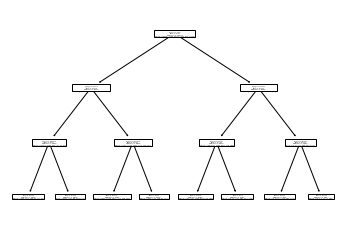

In [12]:
from sklearn import tree

tree.plot_tree(CHdataDT);

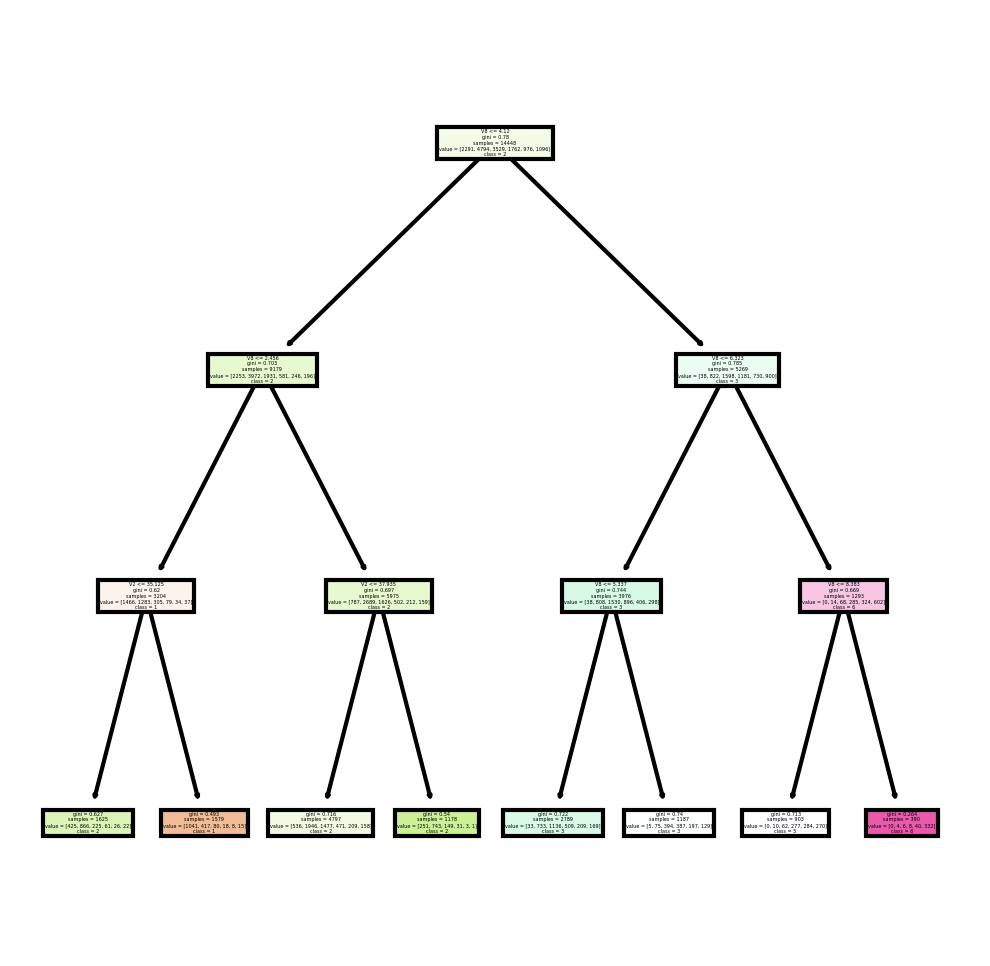

In [13]:
fn=['V1','V2','V3','V4', 'V5', 'V6', 'V7', 'V8']
cn=['1', '2', '3', '4', '5', '6']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(CHdataDT,
feature_names = fn,
class_names=cn,
filled = True);
fig.savefig('CHdataDT.png')